# Mathematics for calculating odds and probabilities of mRS-level outcomes after stroke, based on time to reperfusion treatment

In this notebook we explain how to derive various formulae for probability and odds that will be used in predicting modified Rankin Scale (mRS) after stroke, depending on time to treatment.

The data used in this example correspond to thrombectomy treatment, and can be switched for other data as required without changing the formulae.

## Modified Rankin Scale

The modified Rankin Scale (mRS) is a commonly used scale for measuring the degree of disability or dependence in the daily activities of people who have suffered a stroke or other causes of neurological disability [Saver *et al*., 2010].

The scale runs from 0-6, running from perfect health without symptoms to death:

| Score | Description |
|---|---|
| 0 | No symptoms. |
| 1 | No significant disability. Able to carry out all usual activities, despite some symptoms. |
| 2 | Slight disability. Able to look after own affairs without assistance, but unable to carry out all previous activities. |
| 3 | Moderate disability. Requires some help, but able to walk unassisted. |
| 4 | Moderately severe disability. Unable to attend to own bodily needs without assistance, and unable to walk unassisted. |
| 5 | Severe disability. Requires constant nursing care and attention, bedridden, incontinent. |
| 6 | Dead. |

## Reperfusion treatment for ischaemic stroke

Ischaemic stroke is a stroke caused by the blockage of blood supply to an area of the brain, caused by a clot. Ischaemic strokes account for 80-85% of all strokes, with the remainder being *haemorrhagic* strokes where loss of blood supply is caused by a bleed in the brain.

*Reperfusion* describes the restoration of blood flow following an ischaemic stroke. There are two potential reperfusion treatments:

* *Thrombolysis* (also known as as *intravenous thrombolysis*, IVT) is a medical therapy where *clot-busting* drugs are used to reduce or remove the blood clot. About 20% of all stroke patients are suitable for thrombolysis. 

* *Thrombectomy* (also known as *mechanical thrombectomy*, MT) is the mechanical removal of a clot, by a mesh device under image guidance. Thrombectomy is suitable only for clots in a large vessel (these generally cause the worst strokes), and is a suitable treatment in about 10% of all stroke patients.

## Decay of effect of reperfusion treatment

Reperfusion treatment becomes less effective with increasing time after stroke (with the loss of effect occurring over some hours). Emberson *et al.* and Fransen *et al.* have described the declining effect as the declining *odds ratio* of achieving an essentially *'good outcome'* following thrombolysis (Emberson) or thrombectomy (Fransen). A *'good outcome'* has been described differently with studied on thrombolysis generally using a threshold of mRS 0-1 at 3-6 months, and thrombectomy studies generally using a threshold of mRS 0-2 at 3-6 months. The *odds ratio* describes the odds of a *'good outcome'* relative to the odds of a *'good outcome'* in an untreated control group.

The deacy in effectiveness of reperfusion is shown in the figure below (left panel = odds ratio, right panel = log odds ratio, IVT = thrombolysis, MT = thrombectomy).

![](./images/odds_decay.png)

---
## Notebook admin

In [1]:
# Keep notebook cleaner once finalised
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set up MatPlotLib
%matplotlib inline
# Change default colour scheme:
plt.style.use('seaborn-colorblind')

---

## Define probability and odds

We define outcome in terms of probability distributions of mRS scores. These models assume overall mortality is not affected by reperfusion treatment, and so model the distrubition of mRS scores 0-5. 

### Probability

Firstly we will define some probability distributions in terms of $x$, which is a given modified Rankin Scale (mRS), and $t$, the time from onset to treatment.

+ $P(\mathrm{mRS}=x\ |\ t)$, the probability distribution of mRS.
+ $P(\mathrm{mRS}\leq x\ |\ t)$, the cumulative probability.

In all cases, we know that:

+ Probability is not defined beyond the no-effect time $t_{\mathrm{ne}}$, so we set $0\leq t \leq t_{\mathrm{ne}}$.
+ The probabilities of a condition being met and it not being met sum to 1: 
$$ P(\mathrm{mRS}>x\ |\ t) = 1.0 - P(\mathrm{mRS}\leq x\ |\ t) $$

Also, we are not considering mRS=6, so the probability of mRS$\leq5$ is always equal to 1: $P(\mathrm{mRS}\leq5)=1$ at all $t$. 

### Odds and odds ratio

The above mRS probability distributions can be used to define odds and the odds ratio for a given mRS $x$ at a time $t$ before the no-effect time $t_{\mathrm{ne}}$. To make the maths easier, we will also consider the natural log$^{*}$ versions of odds and odds ratio. $^{*}$Whenever this notebook says "log", it means natural log.

#### Odds, $O$:

The odds are an alternative way of expressing the likeliness of an event occurring, for example a patient attaining a good outcome. Odds are expressed in terms of how much more likely it is that the good outcome will be attained rather than the bad outcome (or vice-versa, when the odds are less than one). Here we will calculate odds directly from probabilities, and so the odds will be given as non-integer positive numbers rather than fractions. 

By definition:

+ $\begin{align} \mathrm{odds} =  \frac{\mathrm{probability\ of\ good\ outcome}}{\mathrm{probability\ of\ bad\ outcome}} \phantom{gap} \mathrm{(single\ patient)} \end{align} $

+ $\begin{align} \mathrm{odds} =  \frac{\mathrm{number\ of\ good\ outcomes}}{\mathrm{number\ of\ bad\ outcomes}} \phantom{gap} \mathrm{(group\ of\ patients)} \end{align} $


In terms of $P(t)$:

+ $\begin{align}  O(\mathrm{mRS},x,t) = \frac{P(\mathrm{mRS}\leq x\ |\ t)}{P(\mathrm{mRS}>x\ |\ t)} \end{align}$

Log equivalent:

+ log odds = $\log_{e}(\mathrm{odds}) $

Special cases:
+ At the time when odds=1, only half of the outcomes will be good.
+ When odds=1, log(odds)=0.

#### Odds ratio, $OR$:

The odds ratio is a way to express how much more likely it is that a good outcome will occur if the patient is treated than if they receive no treatment. In either of the two cases, we would expect at least some of the patients to have a good outcome. This odds ratio is a measure of how effective the treatment is at increasing the number of good outcomes compared with the baseline.

By definition:

+ $\begin{align} \mathrm{odds\ ratio} = \frac{\mathrm{odds\ of\ good\ outcome\ if\ treated}}{\mathrm{odds\ of\ good\ outcome\ if\ not\ treated}} \end{align}$

In terms of $P(t)$:

+ $\begin{align}  OR(\mathrm{mRS},x,t) = \left\{ \frac{P(\mathrm{mRS}\leq x\ |\ t)}{P(\mathrm{mRS}>x\ |\ t)} \right\} \div \left\{ \frac{P(\mathrm{mRS}\leq x\ |\ t_{\mathrm{ne}})}{P(\mathrm{mRS}>x\ |\ t_{\mathrm{ne}})} \right\} \end{align}$

Log version:

+ log odds ratio = $\log_{e}(\mathrm{odds\ ratio}) $

Special cases:

+ At $t=t_{\mathrm{ne}}$, the no-effect time, for all mRS the two terms on the right-hand-side of the odds ratio equation are the same, and so $OR(t=t_{\mathrm{ne}})=1$ and  $\log\bigl[OR(t=t_{\mathrm{ne}})\bigr]=0$ by definition.

---

## Collect the data

Throughout this notebook, variable names contain the following strings:

+ `dist` - the mRS probability distributions.
+ `bins` - the cumulative mRS probabilities.
+ `t0_treatment` - treatment at time $t=0$.
+ `no_treatment` - treatment at the no-effect time $t=t_{\mathrm{ne}}$. 

### Gather probabilities from the literature

For $t=0\,$hr, the data comes from the SAMueL-1 full sample:

In [4]:
mrs_prob_dist_t0_treatment = [0.32592, 0.12697, 0.12282, 0.16416, 
                              0.14708, 0.06580, 0.04725]
mrs_prob_bins_t0_treatment = np.cumsum(mrs_prob_dist_t0_treatment)

For $t=t_{\mathrm{ne}}$, the time of no effect, the equivalent "untreated" mRS distribution data comes from Goyal et al. 2016 (Figure 1: A Overall, Control population), where mRS=6 is excluded and $P(\mathrm{mRS}=6)=0.189$.

In [5]:
mrs_prob_dist_no_treatment = [0.05000, 0.07900, 0.13600, 0.16400, 
                              0.24700, 0.13500, 0.18900]
mrs_prob_bins_no_treatment = np.cumsum(mrs_prob_dist_no_treatment)

# Need to normalise because it currently doesn't add up to 1 
# (non-zero mRS=6 is excluded).
mrs_prob_bins_no_treatment = (
    mrs_prob_bins_no_treatment / mrs_prob_bins_no_treatment[-1])

Define the time of no effect $t_{\mathrm{ne}}$ that matches the Goyal et al. 2016 distribution:

In [6]:
t_ne = 8 * 60 # minutes

### Convert probability to odds and odds ratio

In [7]:
# Convert to odds:
mrs_odds_bins_t0_treatment    = mrs_prob_bins_t0_treatment / \
                                (1.0 - mrs_prob_bins_t0_treatment)
mrs_odds_bins_no_treatment    = mrs_prob_bins_no_treatment / \
                                (1.0 - mrs_prob_bins_no_treatment)

# Manually set mRS<=5 values to infinity, since P(mRS<=5)=1:
mrs_odds_bins_t0_treatment[-1] = np.inf 
mrs_odds_bins_no_treatment[-1] = np.inf

In [8]:
# Define odds ratio:
mrs_OR_bins_t0_treatment = (
    mrs_odds_bins_t0_treatment / mrs_odds_bins_no_treatment)
mrs_OR_bins_no_treatment = (
    mrs_odds_bins_no_treatment / mrs_odds_bins_no_treatment)

In [9]:
# Convert to log(odds):
mrs_logodds_bins_t0_treatment = np.log(mrs_odds_bins_t0_treatment)
mrs_logodds_bins_no_treatment = np.log(mrs_odds_bins_no_treatment)

In [10]:
# Convert to log(odds ratio):
mrs_logOR_bins_t0_treatment   = np.log(mrs_OR_bins_t0_treatment)
mrs_logOR_bins_no_treatment   = np.log(mrs_OR_bins_no_treatment)

### Plot our known data

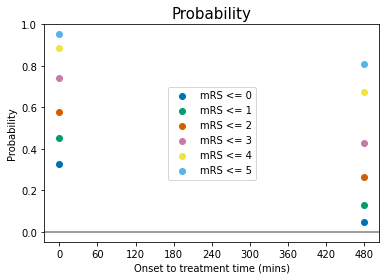

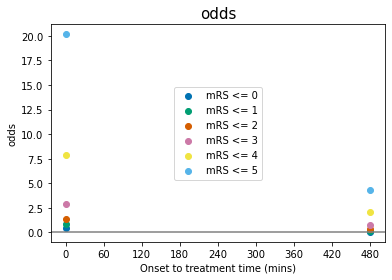

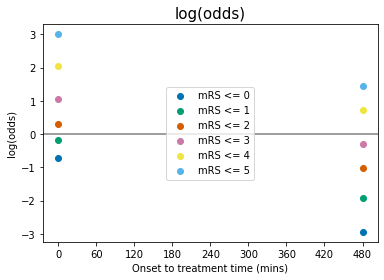

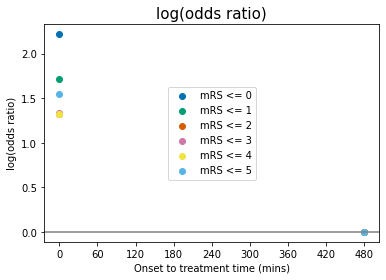

In [11]:
data_lists = [
    [mrs_prob_bins_t0_treatment,    mrs_prob_bins_no_treatment],
    [mrs_odds_bins_t0_treatment,    mrs_odds_bins_no_treatment],
    [mrs_logodds_bins_t0_treatment, mrs_logodds_bins_no_treatment],
    [mrs_logOR_bins_t0_treatment,   mrs_logOR_bins_no_treatment]
    ]

ylabels = ['Probability', 'odds', 'log(odds)', 'log(odds ratio)']

for d,data_list in enumerate(data_lists):
    d_t0 = data_list[0]
    d_no = data_list[1]
    for i in range(6):
        plt.scatter([0.0,t_ne], [d_t0[i],d_no[i]], label=f'mRS <= {i}')
    plt.axhline(0.0, color='grey')
    plt.ylabel(ylabels[d])
    plt.title(ylabels[d], fontsize=15)
    plt.xlabel('Onset to treatment time (mins)')
    plt.xticks(np.arange(0,t_ne+60,60))
    plt.legend(loc='center')
    plt.show()

Some comments on the above plots:

+ odds, log(odds), and log(odds ratio) for $\mathrm{mRS}\leq5$ are not defined for any $t$. This is because $P(\mathrm{mRS}\leq5)=1.0$ at all times, and so:
$$O(\mathrm{mRS}\leq5) = \frac{P(\mathrm{mRS}\leq5)}{1-P(\mathrm{mRS}\leq5)} = \frac{1}{0}$$
+ When $P(\mathrm{mRS},x,t)<0.5$, then $O(\mathrm{mRS},x,t)<1$ and $\log\bigl[O(\mathrm{mRS},x,t)\bigr]<0$. 
+ log(odds ratio)=0 at the no-treatment-time $t=t_{\mathrm{ne}}$ for all mRS, by definition (see maths cell above). 
+ The data for probability, odds and log(odds) show the mRS points stacked on top of each other with increasing mRS, but the log(odds ratio) show the points in a different order at $t=0$. 

---

## Aims 

We know all about the probabilities and odds of mRS at $t=0\,$hr and $t=t_{\mathrm{ne}}$ from the data above. 
Now say we want to know a patient's expected mRS at a generic time $t$ when they received treatment.
We need to use the data we have at $t=0\,$hr and $t=t_{\mathrm{ne}}$ to create models to describe probability and odds at all $t$. 

Since we know that probability, odds, log odds, and log odds ratio are all linked, 
we only need to find a formula for one of these distributions.
That formula can then be converted into the forms required to find the other quantities.
We'll start with the simplest formula, which is for log odds ratio.

In the literature, the log odds ratio has been presented at regular time intervals and falls off approximately linearly with time $t$. This allows it to be modelled as a straight line. For example, from Allen.pdf pseudocode paper §2.4.1, for an odds ratio $OR$ and time in hours from onset to treatment $t$, we have $\log(OR) = 0.746 - 0.12t$. More generically, the straight line formula is $\log(OR) = a + bt$ for constants $a$ and $b$.

### Steps

The steps here are, for mRS$\leq$4$^*$:
1. Define log(odds ratio), a straight-line formula $a + bt$. **(Equation 5)**
2. Find $a$ and $b$ using the known probabilities at $t=0\,$hr and $t=t_{\mathrm{ne}}$. **(Equations 6 and 7)**
3. Define log(odds), another straight line  $A+bt$, by converting the log(odds ratio) formula. **(Equation 10)**
4. Find $A$ using the known log(odds) at $t=0\,$hr. **(Equations 8 and 12)**
5. Define odds, an exponential decay, by converting log(odds). **(Equation 14)**.
6. Define probability as a function of $t$ by converting odds. **(Equations 16 and 17)**

$^*$ We cannot include mRS$\leq$5 in these calculations as noted above, but luckily we already know that $P(\mathrm{mRS}\leq5)=1.0$ at all $t$.

#### Constant reference:

(these will be defined throughout the steps above)

| Constant | Definition | Equation reference | 
| --- | :-- | :-- |
| a | log(odds ratio) at time $t=0\,$hr | Equation 6 |
| b | Gradient of the log(odds ratio) line | Equation 7 |
| A | log(odds) at time $t=0\,$hr | Equations 8, 12 |

#### Step 1: Define straight-line formula for log(odds ratio) 

By definition, odds ratio:

1 : $$ OR(\mathrm{mRS},x,t) = \left\{\frac{P(\mathrm{mRS}\leq x\ |\ t)}{P(\mathrm{mRS}>x\ |\ t)}\right\} \div \left\{\frac{P(\mathrm{mRS}\leq x\ |\ t_{\mathrm{ne}})}{P(\mathrm{mRS}>x\ |\ t_{\mathrm{ne}})}\right\} $$

Taking the natural logarithm of both sides, this can be rewritten as:

2 : $$\log[OR(\mathrm{mRS},x,t)] = \Bigl\{\log\big[P(\mathrm{mRS}\leq x\ |\ t)\bigr] - \log\bigl[P(\mathrm{mRS}>x\ |\ t)\bigr]\Bigr\} - \Bigl\{\log\bigl[P(\mathrm{mRS}\leq x\ |\ t_{\mathrm{ne}})\bigr] - \log\bigl[P(\mathrm{mRS}>x\ |\ t_{\mathrm{ne}})\bigr]\Bigr\} $$ 




Define some variables to make this shorter: 

3 : $$\log(OR) = (G - B) - (G_{t\mathrm{ne}} - B_{t\mathrm{ne}}) $$ 

where "_G_" is for Good outcome and "_B_" is for Bad outcome. In full:

| | | | |
| :--- | :--- | | :--- |
| $ G\phantom{_{tne}}$ | $=\log\bigl[\phantom{1 11 } P(\mathrm{mRS}\leq x\ |\ t)\bigr] $ | $\phantom{G}$ | Varies with mRS, $x$, and $t$ |
| $ B\phantom{_{tne}}$ | $=\log\bigl[1 − P(\mathrm{mRS}\leq x\ |\ t)\bigr] $  | | Varies with mRS, $x$, and $t$ |
| $ G_{t\mathrm{ne}}$ | $=\log\bigl[\phantom{1 11 } P(\mathrm{mRS}\leq x\ |\ t_{\mathrm{ne}})\bigr] $ | | Known constant for a fixed $t=t_{\mathrm{ne}}$ and a given mRS and $x$. |
| $ B_{t\mathrm{ne}}$ | $=\log\bigl[1 − P(\mathrm{mRS}\leq x\ |\ t_{\mathrm{ne}})\bigr] $  | | Known constant for a fixed $t=t_{\mathrm{ne}}$ and a given mRS and $x$. |

Next, assume a linear relationship between log(odd ratio) and time holds for all values of mRS. For each value of mRS we solve:

4 : $$ \log(OR) = a + bt $$


i.e. **$a$ is log(odds ratio) at t=0**, and **$b$ is the gradient of the slope**. Equating 3 and 4:

5 : $$ a + bt = (G - B) - (G_{t\mathrm{ne}} - B_{t\mathrm{ne}}) $$ 

This form holds for all $t$. To find $a$ and $b$, we need to consider the values of $G$ and $B$ when $t=0\,$hr or $t=t_{\mathrm{ne}}$, as this is the data available to us.

#### Step 2: Find $a$ and $b$ using the known probabilities


##### Find $a$

Consider Equation 5 when $t=0\,$hr. The equation becomes:

6: $$ a = (G_{t=0}-B_{t=0}) - (G_{t\mathrm{ne}} - B_{t\mathrm{ne}}) $$ 

We know each of the four terms on the right-hand-side from our data arrays.

In [12]:
# Use the [:-1] slice to exclude mRS<=5.
G_t0  = np.log(      mrs_prob_bins_t0_treatment[:-1])
B_t0  = np.log(1.0 - mrs_prob_bins_t0_treatment[:-1])
G_tne = np.log(      mrs_prob_bins_no_treatment[:-1])
B_tne = np.log(1.0 - mrs_prob_bins_no_treatment[:-1])

a = (G_t0 - B_t0) - (G_tne - B_tne)

In [13]:
a

array([2.21774213, 1.72082896, 1.32532755, 1.33122528, 1.32450885,
       1.54737885])

`a` is an array of 5 values, one each for mRS$\leq$0,1,2,3,4.

Compare these values with the calculated log(odds ratio) at $t=0$:

In [14]:
mrs_logOR_bins_t0_treatment

array([2.21774213, 1.72082896, 1.32532755, 1.33122528, 1.32450885,
       1.54737885,        nan])

##### Find $b$

Consider Equation 5 when $t=t_{\mathrm{ne}}$. 

$$ a + bt_{\mathrm{ne}} = (G_{t\mathrm{ne}} - B_{t\mathrm{ne}}) - (G_{t\mathrm{ne}} - B_{t\mathrm{ne}}) $$ 

The terms on the right-hand-side cancel to zero, and so:

7: $$ b = -\frac{a}{t_{\mathrm{ne}}} $$

In [15]:
b = -a/t_ne

b

array([-0.0046203 , -0.00358506, -0.0027611 , -0.00277339, -0.00275939,
       -0.00322371])

`b` is an array of 5 values, one each for mRS$\leq$0,1,2,3,4. 
All of the $b$ values are negative because log(odds ratio) decreases with time.

##### Plot log(odds ratio) with time:

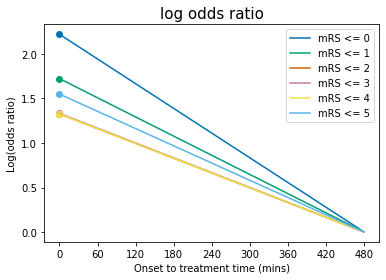

In [16]:
t = np.arange(0,t_ne)

for i,a_i in enumerate(a):
    plt.plot(t, a_i + b[i]*t, '-', label = f'mRS <= {i}')
    # Scatter the original data:
    plt.scatter(0, mrs_logOR_bins_t0_treatment[i])#, label= f'a(mRS <= {i})')

plt.legend(loc='best')
plt.ylabel('Log(odds ratio)')
plt.xlabel('Onset to treatment time (mins)')
plt.xticks(np.arange(0.0,t_ne+60.0,60.0))
plt.title('log odds ratio', fontsize=15)
plt.show()

#### Step 3: Find formula for log(odds)

We eventually want to convert the equation for log(odds ratio), Equation 5, into an equation for probability as a function of $t$. The important variables then are $y$ and $n$. In Equation 5:

5 : $$ a + bt = (G - B) - (G_{t\mathrm{ne}} - B_{t\mathrm{ne}}) $$ 

where the $(G - B)$ term is equivalent to the log(odds):

$$ G - B \equiv \log\big[P(\mathrm{mRS}\leq x\ |\ t)\bigr] - \log\bigl[P(\mathrm{mRS}>x\ |\ t)\bigr] = \log\left[\frac{P(\mathrm{mRS}\leq x\ |\ t)}{1 - P(\mathrm{mRS}\leq x\ |\ t)}\right] $$

So we will find an equation for log(odds) as one of the steps towards finding an equation for probability.

Firstly, the current Equation 5 can be simplified by removing some of the terms. The two rightmost terms, $G_{t\mathrm{ne}}$ and $B_{t\mathrm{ne}}$, are known constants. So we can combine these terms with the other constant, $a$, to define a new constant $A$:

8: $$ A = a + (G_{t\mathrm{ne}} - B_{t\mathrm{ne}}) $$


Combining Equations 5 and 9 gives: 

9: $$ A + bt = (G - B) $$

In terms of probabilities:

10: $$ A + bt = \log\left[\frac{P(\mathrm{mRS}\leq x\ |\ t)}{1 - P(\mathrm{mRS}\leq x\ |\ t)}\right] $$

11: $$ A + bt =  \log\bigl[O(\mathrm{mRS}\leq x\ |\ t)\bigr] $$

This is the formula for log(odds) in terms of $A$, $b$ and $t$.

To find out what $A$ actually represents, there are two options. We could take Equation 8, rewrite each term as a probability $P(\mathrm{mRS},t)$, and cancel out all of the $t_{\mathrm{ne}}$ terms. Alternatively, we can just consider Equation 11 for the case at time $t=0$: 

12: $$ A =  \log\bigl[O(\mathrm{mRS}\leq x\ |\ t=0)\bigr] $$

So **$A$ is equal to the log-odds at $t=0\,$hr**.

#### Step 4: Calculate $A$

Calculate the values of $A$ using Equation 9.

In [17]:
A = a + (G_tne - B_tne)

A

array([-0.72669685, -0.18900061,  0.30518688,  1.04529299,  2.05995841,
        3.00389989])

`A` is an array of 5 values, one each for mRS$\leq$0,1,2,3,4. 

Compare these with the log odds at $t=0$ that we calculated earlier:

In [18]:
mrs_logodds_bins_t0_treatment

array([-0.72669685, -0.18900061,  0.30518688,  1.04529299,  2.05995841,
        3.00389989,         inf])

##### Plot log(odds) with time

Plotting Equation 9:

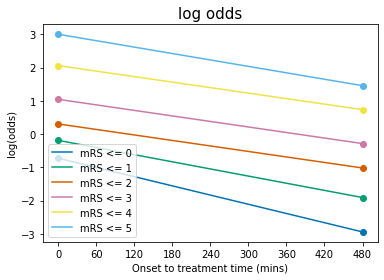

In [19]:
t = np.arange(0,t_ne)

for i,A_i in enumerate(A):
    l, = plt.plot(t, A_i + b[i]*t, '-', label = f'mRS <= {i}')
    colour = l.get_color()
    # Scatter the original data:
    plt.scatter(   0, mrs_logodds_bins_t0_treatment[i], color=colour)
    plt.scatter(t_ne, mrs_logodds_bins_no_treatment[i], color=colour)

plt.legend(loc='best')
plt.ylabel('log(odds)')
plt.xlabel('Onset to treatment time (mins)')
plt.xticks(np.arange(0.0,t_ne+60.0,60.0))
plt.title('log odds', fontsize=15)
plt.show()

#### Step 5: Find formula for odds:

Going back to Equation 10, the log(odds):

10: $$ A + bt = \log\left[\frac{P(\mathrm{mRS}\leq x\ |\ t)}{1 - P(\mathrm{mRS}\leq x\ |\ t)}\right] $$

Taking the exponential of both sides gives an equation for odds:

13: $$e^{A + bt} = \frac{P(\mathrm{mRS}\leq x\ |\ t)}{1 - P(\mathrm{mRS}\leq x\ |\ t)} $$

In other words: 

14: $$ O(\mathrm{mRS}\leq x\ |\ t) = e^{A + bt} $$

$$ O(\mathrm{mRS}\leq x\ |\ t) = e^{A} \cdot e^{bt} $$

and $A = \log\bigl[O(\mathrm{mRS}\leq x\ |\ t=0)\bigr]$, so 

15: $$ O(\mathrm{mRS}\leq x\ |\ t) = O(\mathrm{mRS}\leq x\ |\ t=0) \cdot e^{bt} $$

Odds will decay exponentially with time because $b$ is negative.

##### Plot the odds

Plotting Equation 14:

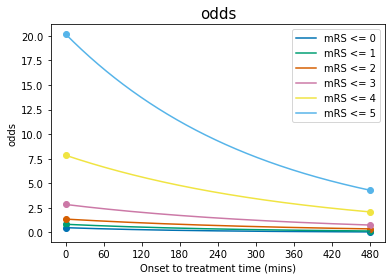

In [20]:
t = np.arange(0,t_ne)

for i,A_i in enumerate(A):
    l, = plt.plot(t, np.exp(A_i + b[i]*t), '-', label = f'mRS <= {i}')
    colour = l.get_color()
    # Scatter the original data:
    plt.scatter(   0, mrs_odds_bins_t0_treatment[i], color=colour)
    plt.scatter(t_ne, mrs_odds_bins_no_treatment[i], color=colour)

plt.legend(loc='best')
plt.ylabel('odds')
plt.xlabel('Onset to treatment time (mins)')
plt.xticks(np.arange(0.0,t_ne+60.0,60.0))
plt.title('odds', fontsize=15)
plt.show()

#### Step 6: Find formula for probability:

Now we can solve Equation 13, the odds ratio in exponential form:

13: $$e^{A + bt} = \frac{P(\mathrm{mRS}\leq x\ |\ t)}{1 - P(\mathrm{mRS}\leq x\ |\ t)} $$

in terms of probability $P \equiv P(\mathrm{mRS}\leq x\ |\ t)$ and odds $O=e^{A + bt}$: 

$$ O = \frac{P}{1 - P} $$

by inverting this to find a formula for $P$:

$$
\begin{aligned}
O(1-P) & = P \\
O - (O\cdot P) & = P \\ 
O & = P + (O\cdot P) \\
O & = P(1+O) \\
\frac{O}{1+O} & = P \\
\end{aligned}
$$

To simplify this, we can multiply the left-hand-side by a factor of $\frac{\frac{1}{O}}{\frac{1}{O}}$, which is equal to 1:

$$ P = \frac{O}{1+O} \cdot  \frac{\frac{1}{O}}{\frac{1}{O}} $$

$$ P = \frac{1}{\frac{1}{O} + 1}$$

Then $\frac{1}{O} = O^{-1} = (e^{A+bt})^{-1} = e^{-(A+bt)}$, so

16: $$ P = \frac{1}{1+e^{-(A + bt)}} $$

So _A_ and _b_ are all that is needed to calculate probability _P_ as a function of time $t$. 

Equation 16 is almost in the form of a [logistic function](https://en.wikipedia.org/wiki/Logistic_function):

$$ f(x) = \frac{L}{1 + e^{-k(x - x_0)}} $$

With one more rearrangement $ A + bt = b\left(t +\frac{A}{b}\right) $, we have:

17: $$ P = \frac{1}{1+e^{-b\left(t +\frac{A}{b}\right)}} $$

Compared with $f(x)$ above, $L=1$, $k=b$, $x=t$, and $x_0 = -\frac{A}{b}$.

##### Plot P as a function of time 

Each mRS value has a different _A_ and _b_ to calculate its probability with time.

Because all of the calculations so far have used cumulative probability $P(\mathrm{mRS}\leq x\ |\ t)$, the lines should be viewed as being stacked on top of each other. 

We started with the data at t=0 and t=$t_{\mathrm{ne}}$ and have calculated the lines in between.

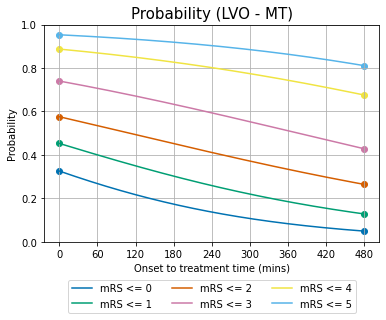

In [21]:
t = np.arange(0,t_ne)

for i,A_i in enumerate(A):
    p_i = 1.0/(1.0 + np.exp(-b[i]*(t+A_i/b[i])) )
    l, = plt.plot(t, p_i, '-', label = f'mRS <= {i}')
    colour = l.get_color()
    # Scatter the original data:
    plt.scatter(0,    mrs_prob_bins_t0_treatment[i], color=colour)
    plt.scatter(t_ne, mrs_prob_bins_no_treatment[i], color=colour)

# General setup:
plt.grid()
plt.ylim(0, 1)
plt.ylabel('Probability')
plt.xlabel('Onset to treatment time (mins)')
plt.xticks(np.arange(0,t_ne+60,60))
plt.legend(loc='center',ncol=3, bbox_to_anchor=[0.5,0.0,0.0,-0.5])
plt.title('Probability (LVO - MT)', fontsize=15)
plt.savefig(f'./images/prob_with_time_lvo_mt.jpg', dpi=300, bbox_inches='tight', 
    pad_inches=0.2)
plt.show()

### Sidetrack: Why do the probability lines bend differently?

> This section isn't essential to understanding the probability calculation or the outcome model.

In the graph of probability with time, the lines for each mRS follow a different path. The gradient of the bottom mRS$\leq$0 line becomes less negative with increasing time, as though gradually curving upwards, whereas the top mRS$\leq$4 line has a gradient becoming more negative with time, as though curving downwards. 

The reason for this is best explained by showing a similar line, another logistic function, with a new parameter $v=-b(t+\frac{A}{b})$, so 

$$ P(v) = \frac{1}{1+e^{v}} $$

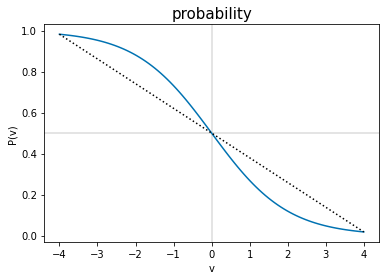

In [22]:
# Define some new parameter "v" for the x-axis:
v = np.linspace(-4,4,100)

# Add a couple of key lines:
plt.axhline(0.5,color='Gainsboro')
plt.axvline(0.0,color='Gainsboro')

# Plot probability as a function of "v":
p_v = 1.0/(1.0+np.exp(v))
plt.plot(v,p_v)

# Draw the straight line connection:
plt.plot([v[0],v[-1]], [p_v[0],p_v[-1]],
        color='k',linestyle=':')

# The usual setup:
plt.ylabel('P(v)')
plt.xlabel('v')
plt.title('probability', fontsize=15)
plt.show()

The bend of $P(v)$ changes at $v=0$, where $P(v)=0.5$. The $P(\mathrm{mRS})$ lines are different shapes because some of them show mostly the $v>0$ curve (i.e. mRS=0,1), and the rest the $v<0$ part (i.e. mRS$\geq$2). This can be viewed as the $v$-axis here being offset to the right in the $P(t)$ plots above. The size of the offset is different for each mRS line.

The find the offset, we can convert from $v$ to $t$. Because $v=-b(t+\frac{A}{b}) =-(A+bt)$, then $t=-\frac{1}{b}(v+A)$. On the $t$-axis, the key point corresponding to $v=0$ is $t_k=-\frac{A}{b}$. This $t_k$ is different for each of the mRS lines, which is why each $P(t)$ line shows a different shift sideways from $P(v)$.  

We can plot the $P(t)$ lines again and add the key points where the bend changes:

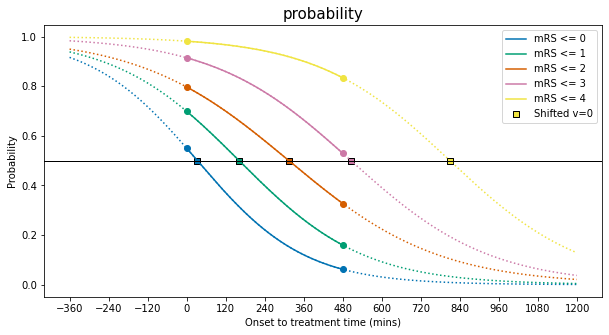

In [23]:
t = np.arange(0,t_ne)
t_long = np.arange(-6*60, t_ne+12*60)

# Store the key times t_k in this list:
tk_list = []

# Use a wider figure than usual:
plt.figure(figsize=(10,5))
for i,A_i in enumerate(A):    
    # Plot probability:
    p_i = np.exp(A_i + b[i]*t)/(1+np.exp(A_i + b[i]*t))
    l, = plt.plot(t, p_i, '-', label = f'mRS <= {i}')
    colour = l.get_color()
    
    # Plot probability over the longer time range:
    p_long = np.exp(A_i + b[i]*t_long)/(1+np.exp(A_i + b[i]*t_long))
    plt.plot(t_long, p_long, '-', color=colour, linestyle=':')
    
    # Mark t=0 and t=t_ne data:
    plt.scatter(0,    mrs_prob_bins_t0_treatment[i], color=colour)
    plt.scatter(t_ne, mrs_prob_bins_no_treatment[i], color=colour)
    
    # Calculate the key time and store it:
    t_k = -A_i/b[i]
    tk_list.append(t_k)
    plt.scatter(t_k, np.exp(A_i + b[i]*t_k)/(1+np.exp(A_i + b[i]*t_k)),
                facecolor=colour, edgecolor='k', marker='s')
    
# Add a horizontal line at P=0.5:
plt.axhline(0.5, lw=1, color='k')
    
# The usual setup:
plt.ylim(0,1)
plt.ylabel('Probability')
plt.xlabel('Onset to treatment time (mins)')
plt.xticks(np.arange(t_long[0],t_long[-1]+120,120))
plt.legend(loc='best')
plt.title('probability', fontsize=15)
plt.show()

Note that the scattered points above at $t=t_k$ all share a probability $P(t=t_k)=0.5$.

In [24]:
# Print the key times:
np.round(tk_list,0)

array([-157.,  -53.,  111.,  377.,  747.,  932.])

### Sidetrack 2: What do A and b mean?

> This section also isn't essential to understanding the probability calculation or the outcome model.

We have defined probability as a logistic function:

17: $$ P = \frac{1}{1+e^{-b\left(t +\frac{A}{b}\right)}} $$

Changing _A_ and _b_ then changes the slope of the function and its offset left and right. 

To see these changes, we'll plot a logistic function with an arbitrary _A_ and _b_:

In [25]:
A_start =  0.0 
b_start = -0.01

And compare it with probability data $P(\mathrm{mRS}\leq \mathrm{mRS}_x)$ for this value of mRS$_x$:

In [26]:
mrs_x = 3

Where we know the target values of _A_ and _b_:

In [27]:
A_target = A[mrs_x]
b_target = b[mrs_x]

print(A_target, b_target)

2.3670375573039477e+00 -0.004689585931213555


We'll also plot over this time range, which is longer than usual: 

In [28]:
t = np.arange(-t_ne,t_ne)

To save repeating some code, we'll put the plot setup into this function: 

In [29]:
def plot_probs_logistic():
    # Mark the central point of the standard logistic function:
    plt.axvline(0.0, color='k', lw=1)
    plt.axhline(0.5, color='k', lw=1)

    # Plot the two known data points for this mRS:
    plt.scatter([0.0,t_ne], 
                [mrs_prob_bins_t0_treatment[mrs_x],
                 mrs_prob_bins_no_treatment[mrs_x]], 
                label='Data', zorder=3)

    # The usual setup:
    plt.ylim(0.0,1.0)
    plt.ylabel('P(t)')
    plt.xlabel('t')
    plt.title('probability', fontsize=15)

First, we'll plot the effect of changing _A_. At time zero, 

$$ P(t=0) = \frac{1}{1+e^{-A}} $$

so _A_ adjusts the x-offset of the curve. We can show this by plotting a series of curves where everything is identical except for _A_:

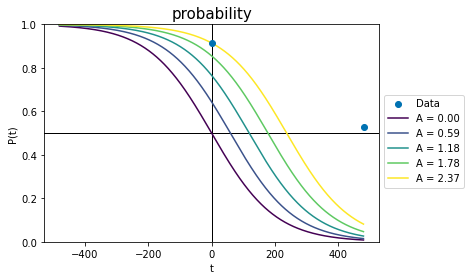

In [30]:
plot_probs_logistic()

# Plot lines for this many values of A...
n_lines = 5
# ... in these colours:
colours = plt.get_cmap('viridis')(np.linspace(0,1,n_lines))

# Plot probability as a function of time:
for i,A_line in enumerate(np.linspace(A_start, A_target, n_lines)):
    p_t = 1.0/(1.0+np.exp(-b_start * (t + A_line/b_start)) )
    plt.plot(t,p_t, color=colours[i], label=f'A = {A_line:1.2f}')

plt.legend(bbox_to_anchor=[1.0,0.5,0.2,0.2]) # outside axis
plt.show()

For the palest line, changing _A_ has fixed the probability line in the right spot at time zero. However, the line is currently nowhere near the data point at the no-effect time. To fix this, we have to change the value of _b_. 

Changing _b_ effectively changes two things simultaneously. It changes the slope of the line, so that the logistic function looks more flattened out or stretched tall. But since _b_ cannot change the value of the probability at time zero (see Equation 17), changing _b_ must also move the probability line left or right to account for the changes. This is seen in the following plot, where every parameter of each curve is identical except for _b_. The palest yellow line is the same as in the previous plot.

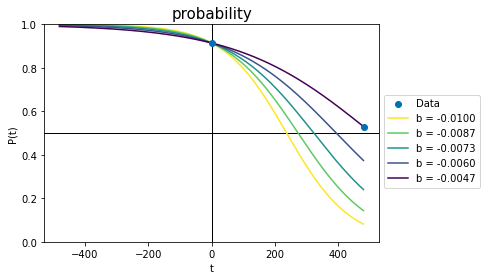

In [31]:
plot_probs_logistic()

# Plot lines for this many values of b...
n_lines = 5
# ... in these colours:
colours = plt.get_cmap('viridis')(np.linspace(0,1,n_lines)[::-1])

for i,b_line in enumerate(np.linspace(b_start, b_target, n_lines)):
    # Plot probability as a function of time:
    p_t = 1.0/(1.0+np.exp(-b_line * (t + A_target/b_line)) )
    plt.plot(t,p_t, color=colours[i], label=f'b = {b_line:1.4f}')

plt.legend(bbox_to_anchor=[1.0,0.5,0.2,0.2]) # outside axis
plt.show()

Each line has a different slope because of the changed _b_, but also a different x-offset - the lines cross $P(t)=0.5$ at different times. The darkest line uses the only combination of _A_ and _b_ that will pass through both data points simultaneously. 

Since our calculated $P(\mathrm{mRS})$ lines all use different values of _A_ and _b_, we end up plotting each line with a different slope and x-offset.

## References

Emberson J, Lees KR, Lyden P, et al. Effect of treatment delay, age, and stroke severity on the effects of intravenous thrombolysis with alteplase for acute ischaemic stroke: A meta-analysis of individual patient data from randomised trials. The Lancet 2014;384:1929–35. doi:10.1016/S0140-6736(14)60584-5

Fransen PSS, Berkhemer OA, Lingsma HF, et al. Time to Reperfusion and Treatment Effect for Acute Ischemic Stroke: A Randomized Clinical Trial. JAMA Neurol 2016;73:190–6. doi:10.1001/jamaneurol.2015.3886

Saver JL, Filip B, Hamilton S, et al. Improving the Reliability of Stroke Disability Grading in Clinical Trials and Clinical Practice. Stroke 2010;41:992–5. doi:10.1161/STROKEAHA.109.571364